---
### Análise exploratória

Nesta seção, deve ser feita a leitura da base de dados e todas as análises necessárias para interpretar e analisar os dados, tais como:
* Significado de cada atributo
* Medidas descritivas
* Gráficos

Primeiro, será feito o carregamento das bibliotecas, das base de dados e a junção dos datasets com o rhp

In [ ]:
import pandas as pd
from scripts.analise_exploratoria import *
from scripts.preprocessamento import *
from scripts.experimentos import *
from scripts.analise_resultados import *


# Carregando os dados OBS: os dados precisam estar na mesma pasta que o arquivo main.ipynb

df_rhp = pd.read_csv('RHP_data.csv')
df_train_base = pd.read_csv('train.csv')
df_test_base = pd.read_csv('test.csv')

In [2]:
df_train, df_test = df_train_base.copy(), df_test_base.copy() # Copiando os dados originais para não alterá-los

# Juntando os dados de RHP com os dados de treino e teste
df_test = df_test.merge(df_rhp, on='Id', how='left')
df_train = df_train.merge(df_rhp, on='Id', how='left')    

Primeiro, vamos carregar a base de dados e verificar as primeiras linhas para entender a estrutura dos dados.

In [3]:
display(df_train.head())

,Id,CLASSE,Peso,Altura,IMC,Atendimento,DN,IDADE,Convenio,PULSOS,...,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2
0,10524,Normal,28.0,123,19.0,11/07/05,13/12/99,5.79,SB,Normais,...,80.0,HAS-1 PAD,Normal,ausente,100,Palpitacao,NaN,M,6 - Suspeita de cardiopatia,6 - Palpitação/taquicardia/arritmia
1,17249,Anormal,32.0,0,NaN,12/02/04,10/06/92,12.11,GS,Normais,...,60.0,Não Calculado,Normal,Sistólico,100,Assintomático,NaN,Masculino,5 - Parecer cardiológico,NaN
2,4483,Anormal,13.0,87,17.0,22/12/03,05/11/01,2.21,SulAmerica,Normais,...,NaN,Não Calculado,Normal,Sistólico,100,Assintomático,NaN,M,6 - Suspeita de cardiopatia,6 - Sopro
3,6830,Normal,11.0,0,NaN,11/12/06,26/05/05,1.6,SA,Normais,...,NaN,Não Calculado,Normal,ausente,100,NaN,NaN,F,1 - Cardiopatia já estabelecida,1 - Cardiopatia congenica
4,11652,Normal,42.4,136,23.0,23/03/01,03/03/01,0.06,NaN,Normais,...,60.0,Não Calculado,Normal,ausente,78,Assintomático,NaN,F,5 - Parecer cardiológico,NaN


Como pudemos observar, temos diversos atributos como variáveis clínicas, classe e informações essenciais para a análise.
Agora, vamos verificar o tipo de cada atributo para entender se precisamos fazer alguma transformação.

In [4]:
display(df_train.dtypes)

Id                 int64
CLASSE            object
Peso             float64
Altura             int64
IMC              float64
Atendimento       object
DN                object
IDADE             object
Convenio          object
PULSOS            object
PA SISTOLICA     float64
PA DIASTOLICA    float64
PPA               object
B2                object
SOPRO             object
FC                object
HDA 1             object
HDA2              object
SEXO              object
MOTIVO1           object
MOTIVO2           object
dtype: object

Com base nos tipos dos atributos vistos acima, podemos observar que os atributos IDADE e FC são do tipo `object`, mas deveriam ser várias numéricas. Vamos converter esses atributos para o tipo correto para que seja mais fácil a análise dos atributos.

In [5]:
df_train["IDADE"] = pd.to_numeric(df_train["IDADE"], errors="coerce")
df_train["FC"] = pd.to_numeric(df_train["FC"], errors="coerce")

df_test["IDADE"] = pd.to_numeric(df_test["IDADE"], errors="coerce")
df_test["FC"] = pd.to_numeric(df_test["FC"], errors="coerce")


Agora, vamos verificar se existem valores faltantes na base de dados.

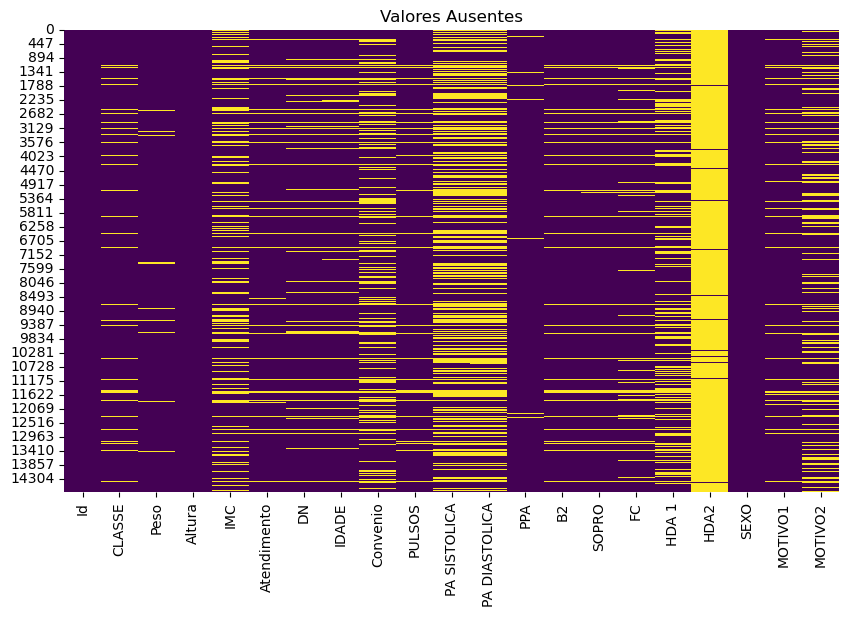

In [6]:
plot_missing_values(df_train)

Como pudemos observar, existem diversos valores faltantes na base de dados que precisam ser tratados, com uma análise mais detalhada, é perceptível que o atributo `HDA2` possuí quase todos os valores faltantes, indicando que talvez esse atributo não seja tão relevante para a análise, podendo ser removido, também podemos observar que o atributo `CLASSE`, que é a variável alvo, também possuí valores faltantes, o que pode ser um problema para a análise, logo, vamos remover as linhas que possuem valores faltantes.

Agora, vamos fazer uma análise básica dos atributos numéricos.

In [7]:
display(df_train.describe())

,Id,Peso,Altura,IMC,IDADE,PA SISTOLICA,PA DIASTOLICA,FC
count,14727.000000,14467.000000,14727.000000,10710.000000,13231.000000,8232.000000,8222.000000,12817.000000
mean,8946.345013,20.979374,82.971209,17.792437,5.970463,101.395773,62.372780,94.084419
std,5167.713313,18.189793,57.028885,11.214492,8.417493,14.995826,8.951357,111.021244
min,2.000000,-40.000000,0.000000,0.000000,-113.180000,10.000000,6.000000,10.000000
25%,4458.500000,6.000000,0.000000,15.000000,2.150000,90.000000,60.000000,80.000000
50%,8926.000000,17.500000,98.000000,17.000000,5.680000,100.000000,60.000000,90.000000
75%,13442.500000,31.000000,130.000000,19.000000,10.010000,110.000000,70.000000,100.000000
max,17873.000000,127.000000,198.000000,848.000000,71.810000,990.000000,120.000000,9288.000000


É possível perceber que muitos dos atributos possuem valores discrepantes e inválidos, vamos fazer uma análise mais detalhada para entender melhor esses valores, para isso, vamos plotar um boxplot para cada atributo numérico.

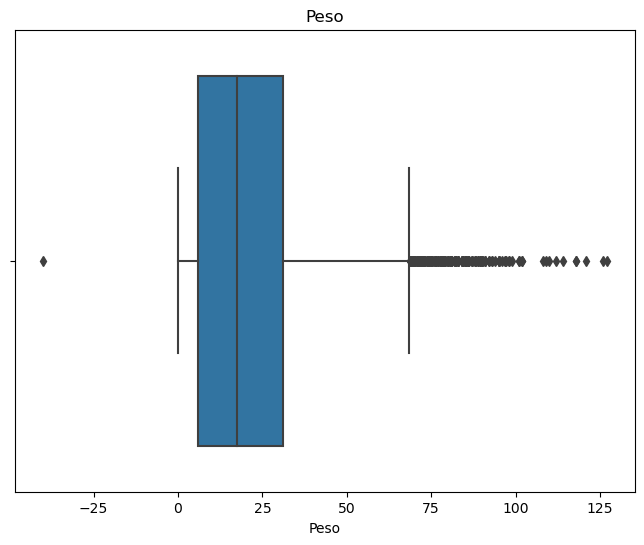

In [8]:
plot_outliers(df_train, 'Peso')

O atributo `Peso` possui muitos valores discrepantes, vemos que existem valores negativos e valores muito altos, vamos remover esses valores para que a análise seja mais precisa.

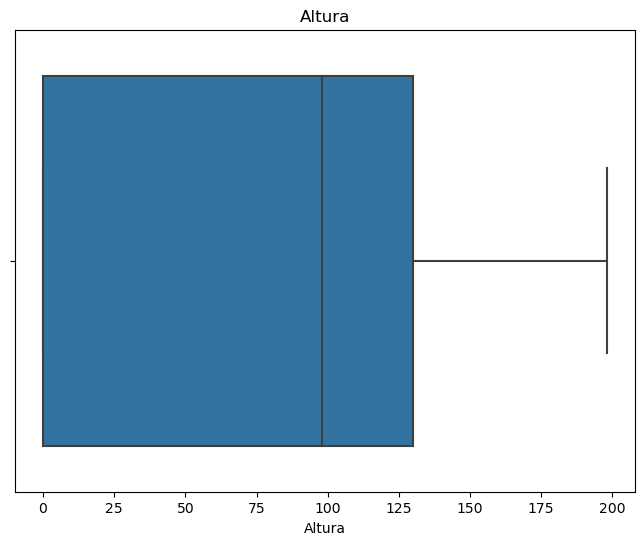

In [9]:
plot_outliers(df_train, 'Altura')

O atributo `Altura` possui valores válidos e com uma faixa de valores aceitável, logo, não será necessário fazer nenhuma alteração.

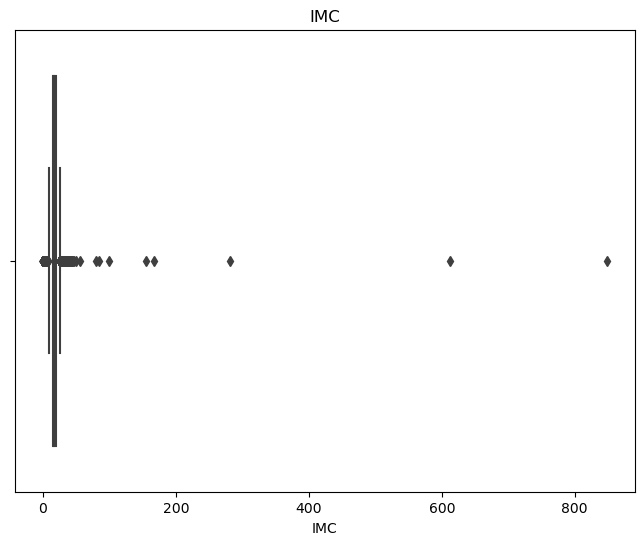

In [10]:
plot_outliers(df_train, 'IMC')

O atributo `IMC` possui valores inválidos, vamos remover esses valores.

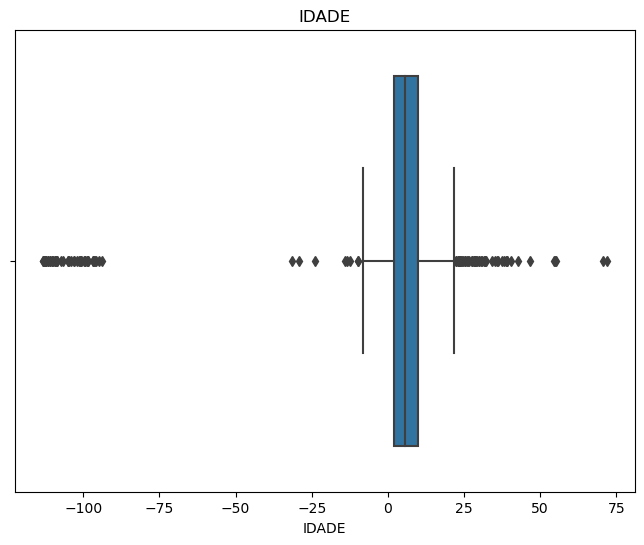

In [11]:
plot_outliers(df_train, 'IDADE')

O atributo `IDADE` possui como valores negativos e valores muito altos, como o foco é em pacientes pediátricos, vamos limitar a idade posteriormente.

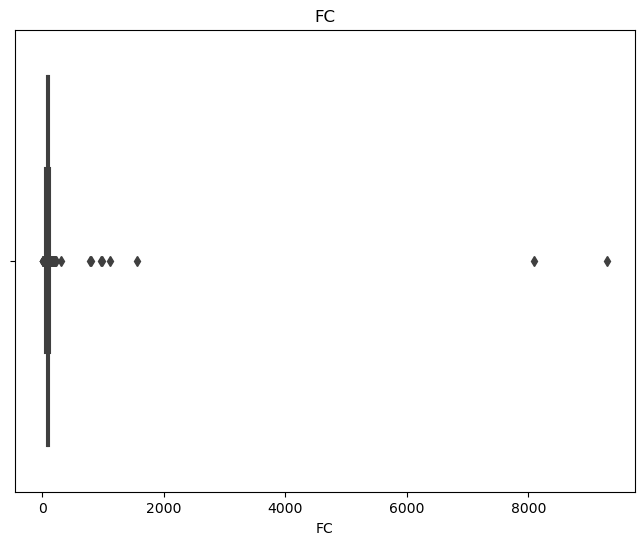

In [12]:
plot_outliers(df_train, 'FC')

A escala do atributo `FC` está muito alta, com valores que são impossíveis para um ser humano, vamos limitar a escala.

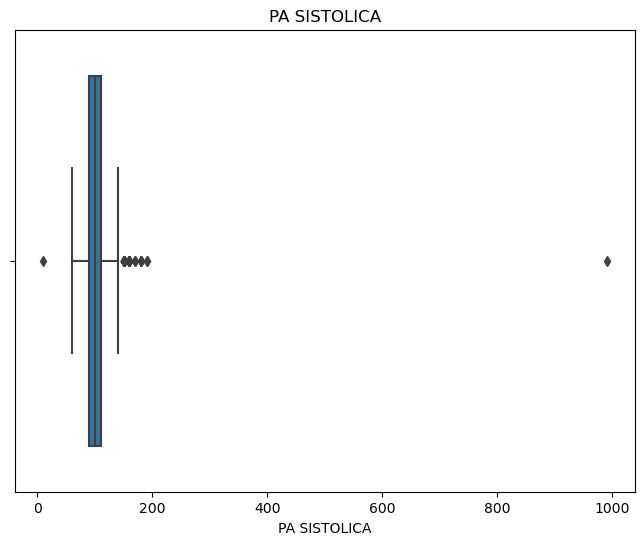

In [13]:
plot_outliers(df_train, 'PA SISTOLICA')

O atributo `PA SISTOLICA` possui apenas um valor discrepante, vamos remover esse valor.

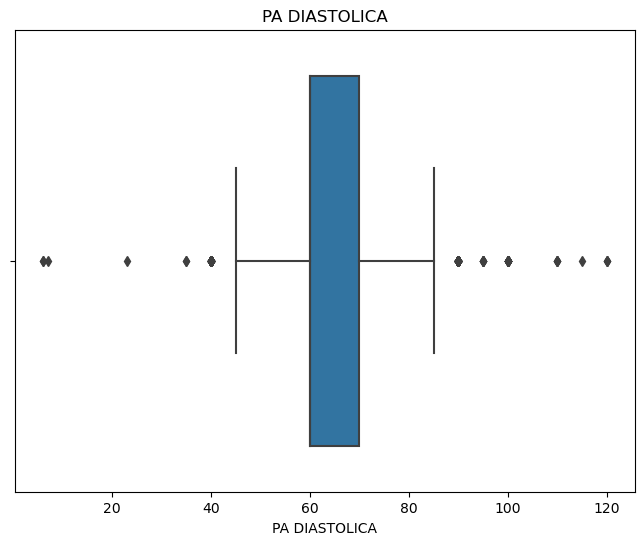

In [14]:
plot_outliers(df_train, 'PA DIASTOLICA')

O atributo `PA DIASTOLICA` possui valores aceitáveis, com poucos valores discrepantes, não será necessário fazer nenhuma alteração.

Abaixo, será contado a quantidade de valores únicos para cada atributo categórico para tentar encontrar valores inválidos.

In [15]:
categorical_cols = df_train.select_dtypes(include=['object']).columns
unique_values_count_categorical = df_train[categorical_cols].nunique()
print(unique_values_count_categorical)


CLASSE            3
Atendimento    2063
DN             6007
Convenio        407
PULSOS            7
PPA               9
B2                5
SOPRO             7
HDA 1             8
HDA2              8
SEXO              6
MOTIVO1           5
MOTIVO2          16
dtype: int64


Duas coisas foram observadas, o atributo `SEXO` possui 6 valores distintos, sendo que o esperado é que tenha apenas 3 valores. O atributo `CLASSE` possui 3 valores distintos, o que não é o esperado, pois deveria ter apenas 2 valores, normal e anormal. Vamos verificar os valores únicos para esses atributos.

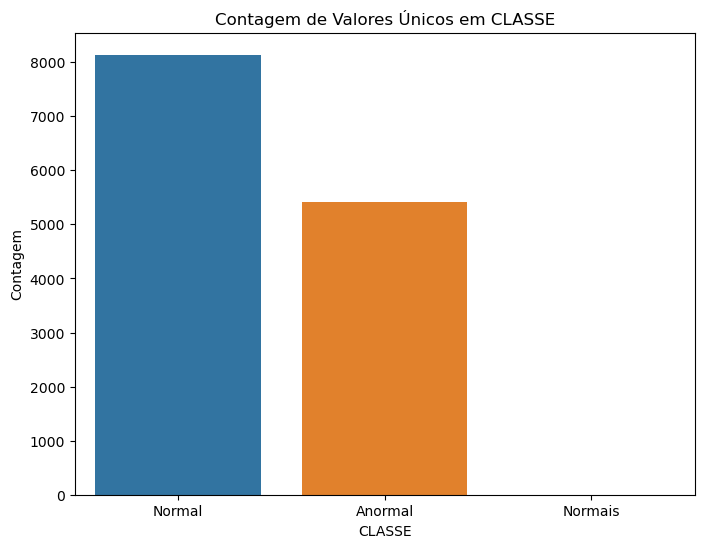

In [16]:
plot_count_values(df_train, 'CLASSE')

O atributo `CLASSE` possui valores inconsistentes como os valores "Normais" que deveriam ser "Normal", será necessário fazer a correção desses valores.

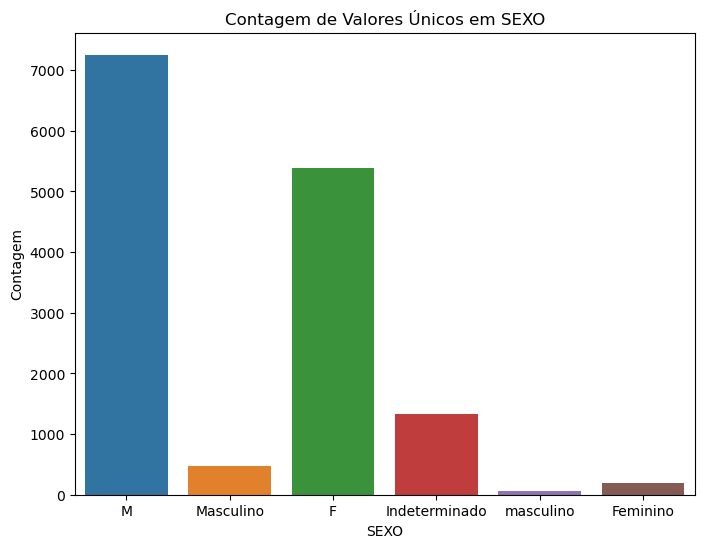

In [17]:
plot_count_values(df_train, 'SEXO')

O atributo `SEXO` possuem valores que representam a mesma coisa com diferentes escritas, será necessário fazer a correção desses valores.

---
### Pré-processamento

Nesta seção, as funções da etapa de pré-processamento dos dados devem ser implementadas e aplicadas (se necessário).

Primeiro, será tratado o atributo alvo, que possui valores inconsistentes, o valor de "Normais" será substituído por "Normal" para que fique com apenas dois valores possíveis, as amostras com valores faltantes serão removidas e por fim, será feita a codificação dos valores, para garantir que a amostra anormal seja representada por 1 e a amostra normal seja representada por 0. 

In [18]:
df_train['CLASSE'] = df_train['CLASSE'].replace('Normais', 'Normal')
df_train = df_train.dropna(subset=['CLASSE'])
df_train['CLASSE'] = (df_train['CLASSE'] == 'Anormal').astype(int)

As amostras classificadas como irrelevantes para a ánalise serão removidas, como Id, Data de Nascimento, Data de Atendimento, qual o convênio do paciente e o HDA2, que possui muitos valores faltantes.

In [19]:
df_train = df_train.drop(columns=['Id', 'DN', 'Convenio', 'Atendimento', 'HDA2'])
df_test = df_test.drop(columns=['Id', 'DN', 'Convenio', 'Atendimento', 'HDA2'])

O atributo `SEXO` será tratado em ambos os datasets, para que fique com apenas 3 valores possíveis. Essa normalização coloca os valores para minusculo e substitui os valores "feminino" por "f" e "masculino" por "m".

In [20]:
df_train = normalize_gender(df_train)
df_test = normalize_gender(df_test)

Agora será feito o tratamento de valores vazios dos dataframes, que se baseia em preencher os valores categoricos com o valor mais frequente e os valores numéricos com a mediana dos valores.

In [21]:
df_train = fill_missing_values(df_train)
df_test = fill_missing_values(df_test)

A codificação dos valores categóricos será feita através do método de codificação one-hot, que transforma os valores categóricos em vetores binários, primeiro será feito a codificação dos valores categóricos do dataset de treino e depois será feito a codificação dos valores categóricos do dataset de teste, com base nos valores do dataset de treino.

OBS: Para utilizar o parametro sparse_output=False do OneHotEncoder, é necessário ter a versão atualizada do scikit-learn, caso não tenha, é necessário utilizar o parametro sparse=False.

In [22]:
df_train = encoder_train(df_train)
df_test = encoder_test(df_test)

O tratamento dos dados foi feito da seguinte forma:

Uma faixa de peso normal foi definido para jovens de até 25 anos, que é até 100kg;

A idade foi limitada para até 25 anos e maior que 0, para que não haja valores inválidos;

A `PA SISTOLICA` foi limitada para até 200, para remover valores discrepantes;

O `IMC` foi limitado para até 50, para remover valores muito elevados;

A `FC` foi utilizada a tecnica do IQR para remover valores discrepantes;

In [23]:
df_train = df_train[((df_train['Peso'] >= 0) & (df_train['Peso'] <= 100))]
df_train = df_train[((df_train['IDADE'] >= 0) & (df_train['IDADE'] <= 25))]
df_train = df_train[(df_train['PA SISTOLICA'] <= 200)]
df_train = df_train[(df_train['IMC'] <= 50)]
df_train = remove_outliers(df_train, ['FC'])

A normalização dos dados foi feita através do método de normalização min-max, que transforma os valores para uma escala de 0 a 1, a normalização foi feita para ambos os datasets, apenas para os atributos numéricos, pois os atributos categóricos já foram codificados.

foi separada a variavel `x` que contém os atributos e a variavel `y` que contém a classe, para o dataset de treino.

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x = df_train.drop(columns=['CLASSE'])
y = df_train['CLASSE']

numerical_cols = x.select_dtypes(include=['float64', 'int64']).columns

x[numerical_cols].iloc[:,:] = scaler.fit_transform(x[numerical_cols])
df_test[numerical_cols].iloc[:,:] = scaler.transform(df_test[numerical_cols])

Agora o dataset está pronto para ser utilizado nos modelos de classificação.

---
### Experimento

Nesta seção, o experimento deve ser conduzido, utilizando os protocolos experimentais padrões e testando diferentes modelos.

Para o experimento, o dataset de treino foi dividido em 80% para treino e 20% para teste.

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Para o experimento, foram utilizados os seguintes modelos de classificação:

* Regressão Logística
* KNN
* Árvore de Decisão
* Random Forest
* SVM
* Rede Neural
* Naive Bayes

Para cada modelo, foi feito uma busca por hiperparâmetros, utilizando a função GridSearchCV, para encontrar os melhores hiperparâmetros para cada modelo, Para alguns modelos que possuem muitos hiperparâmetros, foi feito uma busca aleatória, utilizando a função RandomizedSearchCV, como é o caso da rede neural, arvore de decisão e random forest, logo após isso foi feito o treinamento do modelo com os melhores hiperparâmetros encontrados, utilizando o GridSearchCV para validação cruzada.

Os modelos abaixo foram treinados com muitos outros hiperparâmetros, mas para minimizar o tempo de execução, foram selecionados os melhores hiperparâmetros para cada modelo.

In [26]:
knn = knn_train(x_train, y_train)

In [27]:
nb = naive_bayes_train(x_train, y_train)

Para o modelo de naive bayes, não foi feito a busca por hiperparâmetros, pois o modelo não possui hiperparâmetros.

In [28]:
lr = logistic_regression_train(x_train, y_train)

In [29]:
mlp = mlp_train(x_train, y_train)

In [30]:
svm = svm_train(x_train, y_train)

Para o modelo de máquina de vetores de suporte, não foi feito a busca por hiperparâmetros, pois o modelo em sua configuração padrão já demorou muito tempo para treinar, quando foi feito a busca por hiperparâmetros, o tempo de treinamento foi muito elevado.

In [31]:
dt = decision_tree_train(x_train, y_train)

In [32]:
rf = random_forest_train(x_train, y_train)

---
### Análise dos Resultados

Nesta seção, os resultados devem ser exibidos através de tabelas e gráficos, comparados e profundamente analisados.

In [33]:
models = [['KNN', knn], ['Naive Bayes', nb], ['Regressão Logística', lr], ['SVM', svm],['MLP', mlp], ['Arvore de decisão', dt], ['Random Forest', rf]]


df_results = get_df_results(models, x_test, y_test)


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Na célula acima, foi passado os modelos para uma função que testa os modelos e retorna a acurácia, precisão, recall e f1-score de cada modelo, juntando todos os resultados em um dataframe. (O warning é apenas um aviso de uma mudança que ocorrerá em uma versão futura do SciPy)

Abaixo será mostrado o dataframe com os resultados de cada modelo.

In [34]:
display(df_results)

,Acurácia,F1 Score,ROC AUC,Recall
KNN,0.694585,0.460317,0.542056,0.719659
Naive Bayes,0.918582,0.867063,0.893204,0.918366
Regressão Logística,0.925205,0.863095,0.900621,0.940268
SVM,0.652902,0.181548,0.291169,0.830745
MLP,0.925205,0.873016,0.901639,0.942396
Arvore de decisão,0.924036,0.868056,0.899743,0.939794
Random Forest,0.924036,0.869048,0.899846,0.945049


Como é possível observar, os modelos KNN e SVM tiveram um desempenho ruim comparado aos outros modelos, isso pode ser devido a falta de ajuste de hiperparâmetros, pois o tempo de treinamento desses modelos é muito elevado, o que dificulta a busca por hiperparâmetros.

O modelo naive bayes ficou acima dos modelos KNN e SVM, mas ainda assim, teve um desempenho menor comparado aos outros modelos, principalmente em acurácia.

Os outros modelos tiveram um desempenho muito bom e muito próximo. com destaque para os modelos de regressão logística e arvore de decisão, que tiveram um desempenho bom e um tempo de treinamento muito baixo. 

Podemos ver melhor abaixo com a roc curve, que mostra a relação entre a taxa de verdadeiros positivos e a taxa de falsos positivos.
as curvas de roc dos modelos SVM e KNN estão muito abaixo dos outros modelos, enquanto os modelos de regressão logística, arvore de decisão e random forest e rede neural estão muito próximos, quase se sobrepondo.

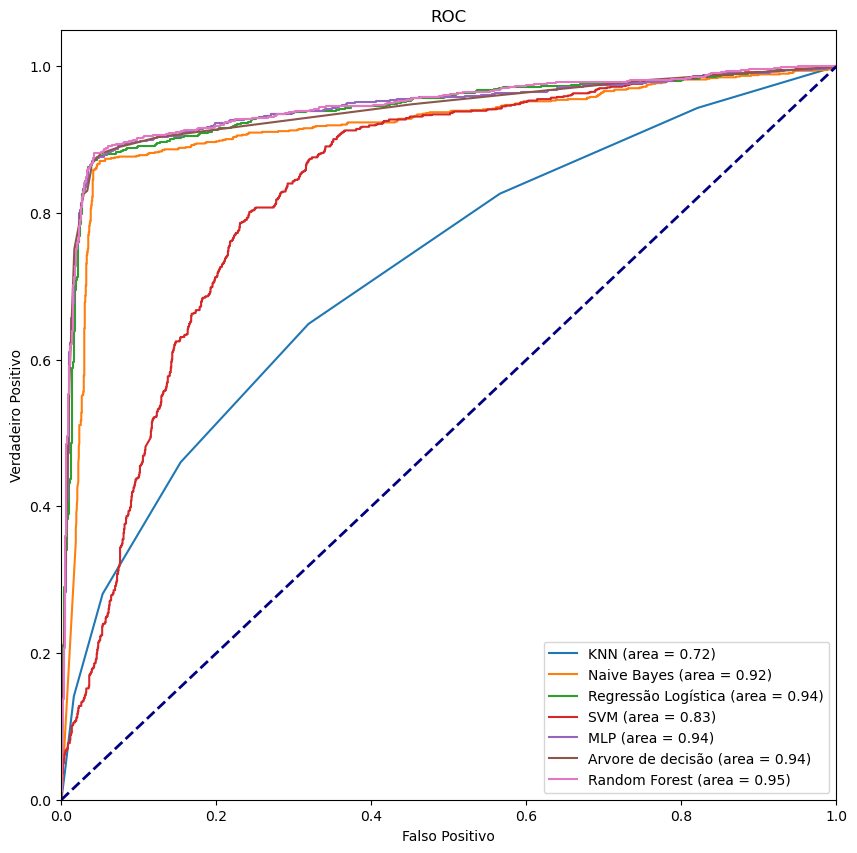

In [35]:
plot_roc_curve(models, x_test, y_test)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


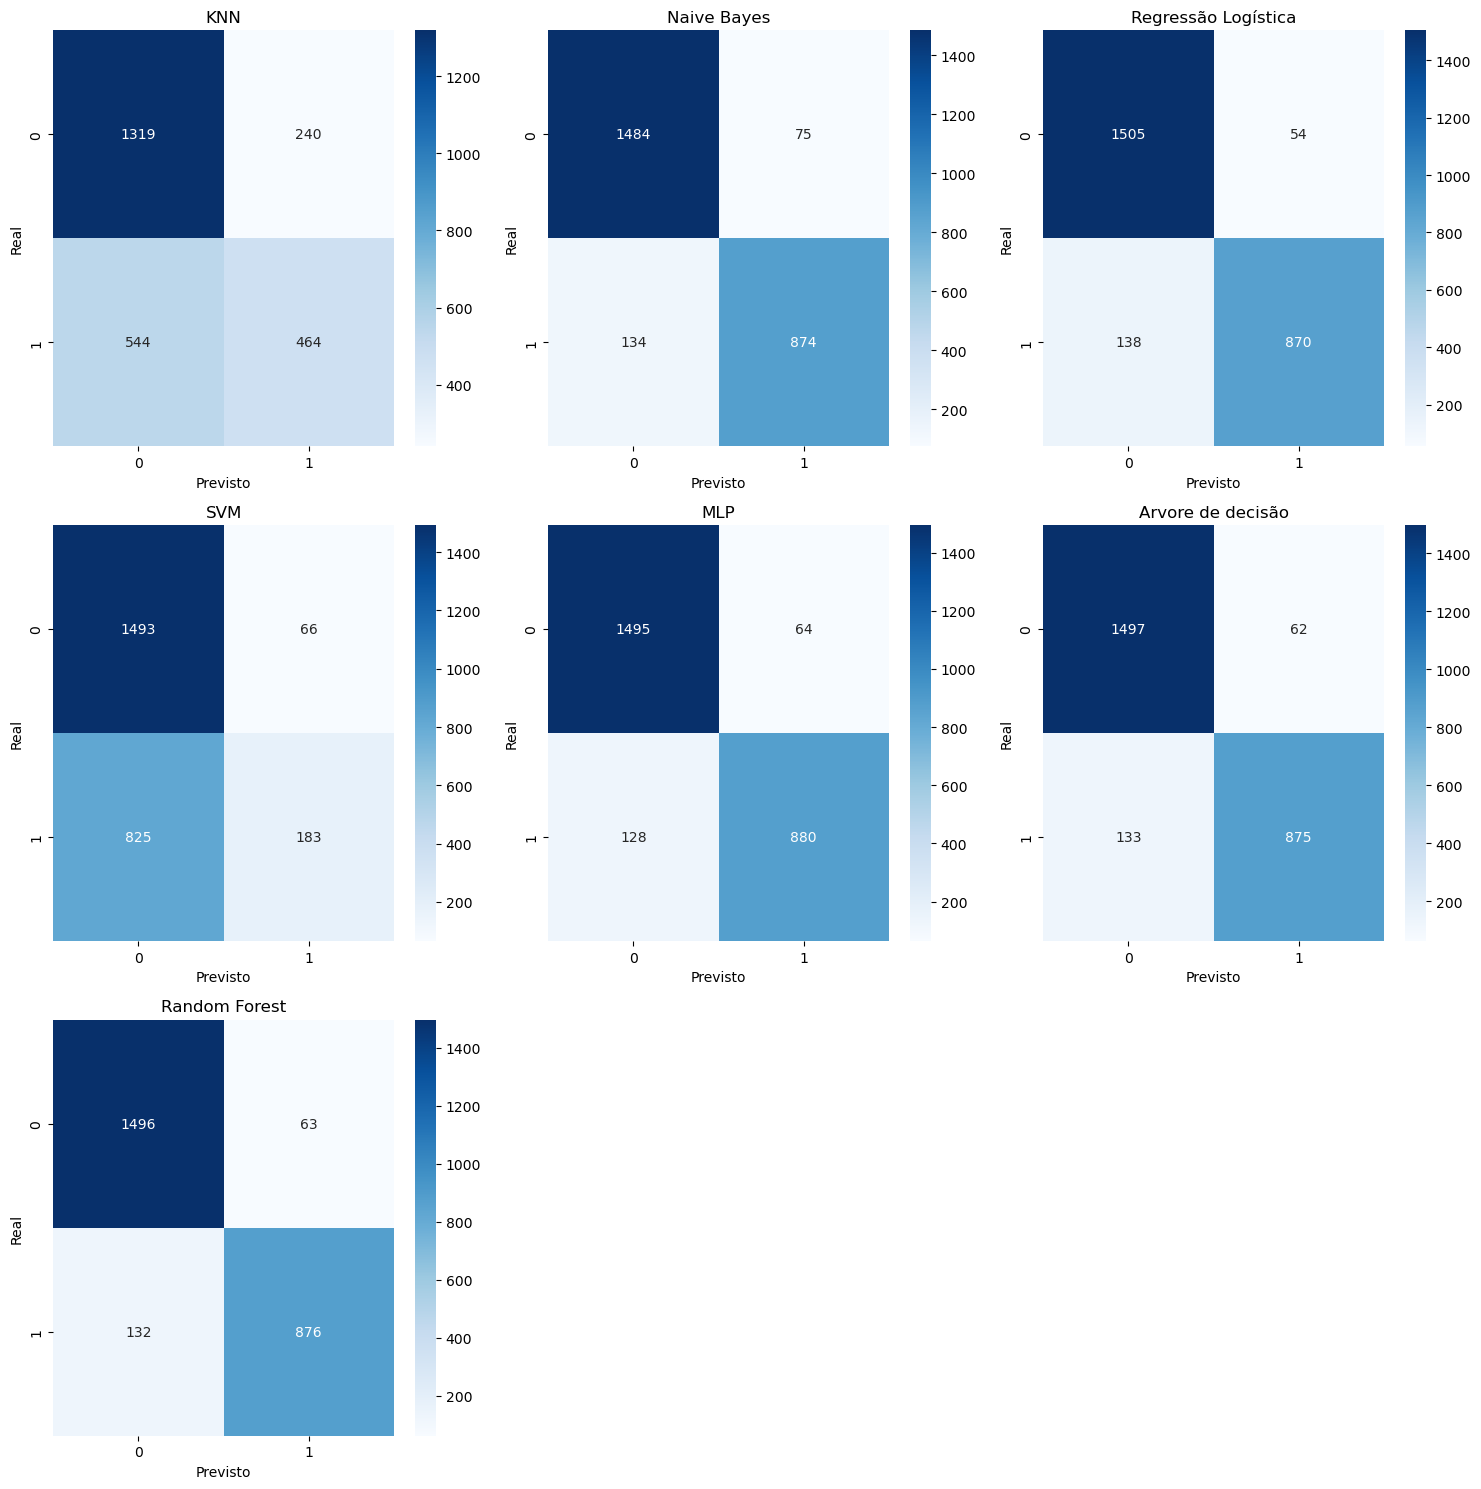

In [36]:
plot_confusion_matrix(models, x_test, y_test)

Com o gráfico de matriz de confusão, podemos ver que os modelos de regressão logística, redes neurais, arvore de decisão e random forest tiveram um desempenho muito bom, com poucos falsos positivos e falsos negativos, destacando a similaridade entre os modelos random forest e arvore de decisão, que se diferenciam apenas em 1 falso negativo. 

Entre os 4 modelos que obtiveram um bom resultado, o modelo de regressão logística foi o modelo selecionado para uso, pois obteve metrícas boas com a melhor acurácia e o melhor roc auc, além de ter um tempo de treinamento muito baixo. Somente analisando as métricas foi difícil escolher o melhor modelo, pois todos tiveram um desempenho muito bom, mudando apenas em poucos pontos percentuais em cada métrica, além de terem um resultado milimetricamente diferente em diferentes ocasiões, com diferentes capacidades computacionais. O modelo de regressão logística foi o modelo mais equilibrado, com um desempenho muito bom em todas as métricas e um tempo de treinamento muito baixo, o que o torna o modelo mais eficiente.

A célula abaixo treina um modelo de regressão logística com os melhores hiperparametros encontrados, dessa vez com 100% dos dados de treino, faz a predição da probabilidade da classe 1
para cada amostra do dataset de teste e salva em um arquivo chamado `submission.csv`, para que possa ser submetido no kaggle.

In [38]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=0.1, max_iter=1000, penalty='l2', solver='liblinear')
model.fit(x_train, y_train)

prob_class_1 = model.predict_proba(df_test)[:,1]

df_test_base['Predicted'] = prob_class_1

df_test_base.to_csv('submission.csv', index=False)

Neste projeto, realizamos uma análise detalhada e um pré-processamento robusto dos dados clínicos de pacientes pediátricos, com o objetivo de construir modelos de classificação para prever a classe de risco dos pacientes. Através de diversas etapas, incluindo a limpeza de dados, tratamento de valores faltantes, normalização e codificação de variáveis categóricas, conseguimos preparar um conjunto de dados adequado para a aplicação de algoritmos de aprendizado de máquina.

Testamos vários modelos de classificação, como Regressão Logística, KNN, Árvore de Decisão, Random Forest, SVM, Rede Neural e Naive Bayes. Cada modelo foi avaliado com base em métricas de desempenho como acurácia, recall e f1-score. 

Este projeto demonstrou a importância de um pré-processamento adequado e a seleção criteriosa de modelos e hiperparâmetros para a construção de sistemas de classificação eficientes em dados clínicos. Os resultados obtidos podem contribuir para a melhoria do diagnóstico e tratamento de pacientes pediátricos, auxiliando profissionais de saúde na tomada de decisões mais informadas. Além disso, observamos que os modelos SVM e MLP poderiam ter um desempenho melhor, mas apresentaram um custo computacional muito elevado, o que dificultou a busca por hiperparâmetros ideais.